<a href="https://colab.research.google.com/github/KilovoIt/Unit-_1-revised/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Concrete/Concrete_Data.csv'

# Use these columns:
mycols = ['cement', 'water','coarse_agg', 'strength']
concrete = pd.read_csv(url, usecols=mycols)

In [ ]:
concrete


,cement,water,coarse_agg,strength
0,540.0,162.0,1040.0,79.99
1,540.0,162.0,1055.0,61.89
2,332.5,228.0,932.0,40.27
3,332.5,228.0,932.0,41.05
4,198.6,192.0,978.4,44.30
...,...,...,...,...
1025,276.4,179.6,870.1,44.28
1026,322.2,196.0,817.9,31.18
1027,148.5,192.7,892.4,23.70
1028,159.1,175.6,989.6,32.77


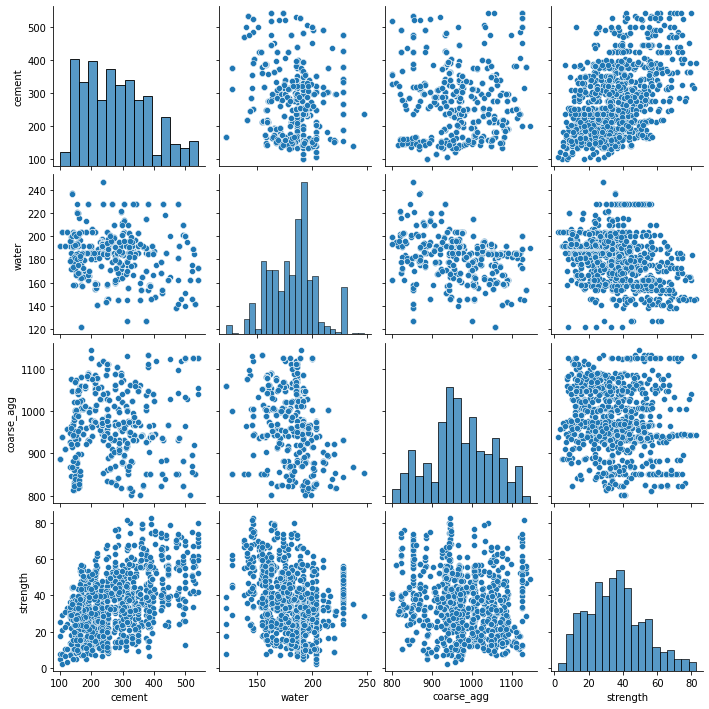

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(concrete)



plt.show()


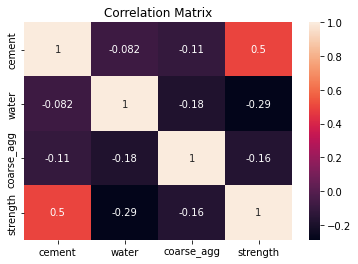

In [ ]:
from scipy.stats import pearsonr

concrete.corr(method='pearson')
sns.heatmap(concrete.corr(method='pearson'), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Concrete/Concrete_Data.csv'

concrete2 = pd.read_csv(url)

concrete2.head()

,cement,furnace,fly_ash,water,super_plasticize,coarse_agg,fine_agg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

model=LinearRegression()

x = concrete2.cement

y = concrete.strength

model.fit(np.array([x]).T, y)

print('The slope: ', model.coef_)

# Intercept
print('The intercept: ', model.intercept_)

# In equation form
print('Best-fit line: y = {:.2f}x + {:.2f}'.format(model.coef_[0], model.intercept_))

The slope:  [0.07958034]
The intercept:  13.442528112399927
Best-fit line: y = 0.08x + 13.44


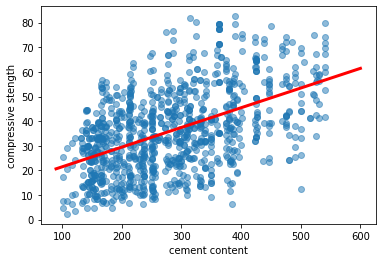

In [ ]:
plt.scatter(x, y, alpha=0.5)
bfx = np.linspace(90, 600, 10)
bfy = 0.08*bfx + 13.44
plt.plot(bfx, bfy, color='r', lw=3)
plt.xlabel('cement content')
plt.ylabel('compressive stength')
plt.show()

In [ ]:
x2 = concrete2.water
model.fit(np.array([x2]).T, y)
print('The slope: ', model.coef_)

# Intercept
print('The intercept: ', model.intercept_)

# In equation form
print('Best-fit line: y = {:.2f}x + {:.2f}'.format(model.coef_[0], model.intercept_))

The slope:  [-0.22658476]
The intercept:  76.95834096883584
Best-fit line: y = -0.23x + 76.96


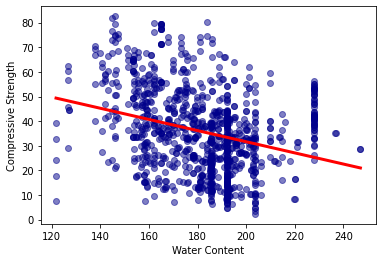

In [ ]:
plt.scatter(x2, y, alpha=.5, color='DarkBlue')
bfl = np.linspace(x2.min(), x2.max(), 10)
plt.plot(bfl, bfl*model.coef_+model.intercept_, color='r', lw=3)
plt.xlabel('Water Content')
plt.ylabel('Compressive Strength')
plt.show()

In [ ]:
residuals = pd.DataFrame()
residuals_ = {}
for column in concrete2.columns[:-1]:
    model = LinearRegression()
    x = np.array([concrete2[column]]).T
    y = concrete2.strength
    model.fit(x, y)
    residuals_[column] = []
    for index, value in enumerate(concrete2[column]):
        residuals_[column].append(concrete2.strength.iloc[index] - model.coef_[0]*value - model.intercept_)

    
        



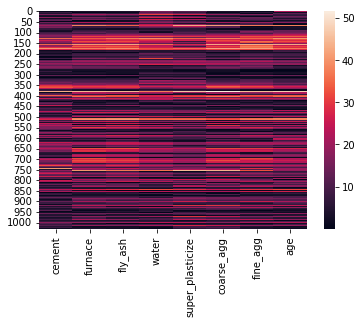

In [ ]:
residuals = pd.DataFrame(residuals_)
residuals = abs(residuals)
sns.heatmap(residuals)


In [ ]:
residual_means = []
for item in residuals.columns:
    print(item)
    residual_means.append(residuals[column].mean())

residual_means

cement
furnace
fly_ash
water
super_plasticize
coarse_agg
fine_agg
age


[12.61201023818645,
 12.61201023818645,
 12.61201023818645,
 12.61201023818645,
 12.61201023818645,
 12.61201023818645,
 12.61201023818645,
 12.61201023818645]

In [ ]:
x3 = concrete2.columns[:-1]
model.fit(concrete2[x3], y)

model.coef_

array([ 0.11980433,  0.10386581,  0.08793432, -0.14991842,  0.2922246 ,
        0.01808621,  0.02019035,  0.11422207])

In [ ]:
sum(np.multiply(concrete2.iloc[30][:-1], model.coef_)) + model.intercept_

58.876648381519516

In [ ]:
concrete2.iloc[30]

cement              304.00
furnace              76.00
fly_ash               0.00
water               228.00
super_plasticize      0.00
coarse_agg          932.00
fine_agg            670.00
age                 365.00
strength             55.26
Name: 30, dtype: float64

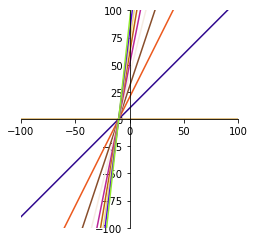

In [ ]:
import random



x_lin = np.linspace(-200, 100, 100)

k = 1
intercept = 0
y_lin = x_lin*1+intercept

fig = plt.figure()
ax = plt.subplot(111)
for i in range(0, 100, 10):
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    intercept = i
    ax.plot(x_lin, x_lin*i/10+intercept, c=color)

ax.spines['bottom'].set_position('center')
ax.spines['left'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim([-100, 100])
ax.set_ylim([-100, 100])
ax.set_aspect('equal')

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the car crash dataset
crashes = sns.load_dataset("car_crashes")

mycols = ['total', 'speeding', 'alcohol']

crashes = crashes[mycols]
crashes.head()

,total,speeding,alcohol
0,18.8,7.332,5.640
1,18.1,7.421,4.525
2,18.6,6.510,5.208
3,22.4,4.032,5.824
4,12.0,4.200,3.360


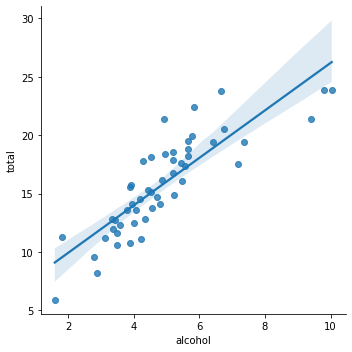

In [ ]:
sns.lmplot(data=crashes, x='alcohol', y='total', ci=95)

plt.show()

In [ ]:
import pandas as pd
import seaborn as sns

# Load the car crash dataset
crashes = sns.load_dataset("car_crashes")

mycols = ['total', 'speeding', 'alcohol']


crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

Y = crashes['total']
X = crashes['alcohol']

# Create the model with the X, Y data
X = sm.add_constant(X)
model = sm.OLS(Y, X)

# Fit the model
results = model.fit()

# Look at the results that include the t-statistic
print(results.t_test([1, 0]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             5.8578      0.921      6.357      0.000       4.006       7.709


In [ ]:
from statsmodels.formula.api import ols

model = ols('total ~ alcohol + no_previous', data=crashes).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     389.7
Date:                Sun, 26 Sep 2021   Prob (F-statistic):           2.11e-30
Time:                        08:54:26   Log-Likelihood:                -71.494
No. Observations:                  51   AIC:                             149.0
Df Residuals:                      48   BIC:                             154.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.2258      0.552      2.221      

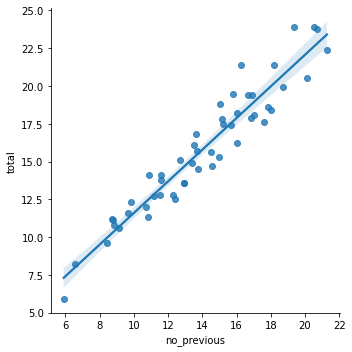

In [ ]:
import seaborn as sns

sns.lmplot(data=crashes, x='no_previous', y='total', ci=95)